In [1]:
'''
- around 82% of videos are correctly predicted.
- Deviation from actual start-time of answers from predicted start-time:
    (Effective-Error)
    - Roberta model:
        - Average of 80.4s or 7.36% of video, 
        - Average of 7.45s or 1.0% of video, ignoring 20% of outliers
    - DistilBert model:
        - Average of 192.24s or 19.5% of video, 
        - Average of 90s or 10.4% of video, ignoring 20% of outliers
'''
''''''

''

In [2]:
import pandas as pd
from utils import *

In [3]:
qdset = pd.read_csv('../yt-dset-questions-v1.csv')
dsetDetails = pd.read_csv('../yt-dset-vid-details.csv')
quesdset = qdset.join(dsetDetails.set_index('Video_ID'), on='Video_ID')

In [4]:
kdset = pd.read_csv('../base-results/yt-dset-results-videoIds-kwdidx.csv')
sdset = pd.read_csv('../base-results/yt-dset-results-videoIds-semidx.csv')
bdset = pd.read_csv('../base-results/yt-dset-results-videoIds-bothidx.csv')
rob_ansdset = pd.read_csv('../base-results/yt-dset-results-ans-rob.csv')
dis_ansdset = pd.read_csv('../base-results/yt-dset-results-ans-dis.csv')

Video Id retrieval results:

In [5]:
correctVideoIds = list(quesdset['Video_ID'])
#Below will be compared

Overall result:


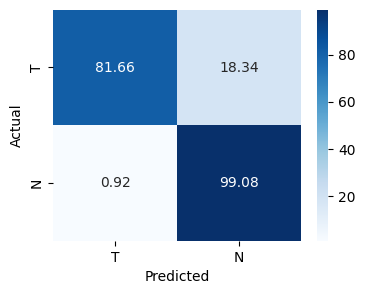

Confused pairs:  [[(401, 405), 25.0], [(105, 206), 21.05], [(107, 204), 14.63], [(401, 402), 13.64], [(106, 407), 6.67]]
Related Videos result:  [80.65, 19.35]


In [6]:
#Keyword Index
predictedVideoIds = list(kdset['Predicted_Video_ID'].astype('Int64'))
res = compareVidIds(correctVideoIds, predictedVideoIds)
print("Overall result:")
drawConfusionMatrix(res['totalResults'])
print("Confused pairs: ", res['confusedResults'])

relatedVideoIds = list(kdset['Related_Video_IDs'])
relRes = compareRelatedVids(correctVideoIds, predictedVideoIds, relatedVideoIds)
print("Related Videos result: ", relRes)

Overall result:


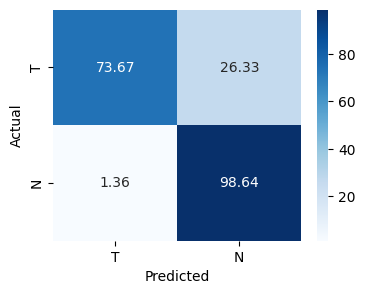

Confused pairs:  [[(107, 204), 21.95], [(104, 207), 18.52], [(202, 203), 17.07], [(401, 405), 16.67], [(105, 206), 15.79]]
Related Videos result:  [65.17, 34.83]


In [7]:
#Semantic Index
predictedVideoIds = list(sdset['Predicted_Video_ID'].astype('Int64'))
res = compareVidIds(correctVideoIds, predictedVideoIds)
print("Overall result:")
drawConfusionMatrix(res['totalResults'])
print("Confused pairs: ", res['confusedResults'])

relatedVideoIds = list(sdset['Related_Video_IDs'])
relRes = compareRelatedVids(correctVideoIds, predictedVideoIds, relatedVideoIds)
print("Related Videos result: ", relRes)

Overall result:


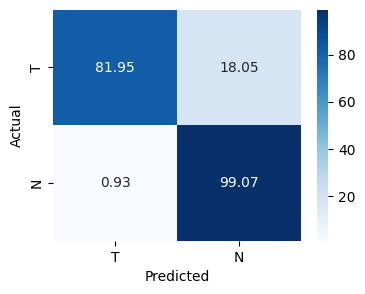

Confused pairs:  [[(401, 405), 20.83], [(105, 206), 18.42], [(107, 204), 17.07], [(401, 402), 13.64], [(106, 404), 11.54]]
Related Videos result:  [83.61, 16.39]


In [8]:
#Combined Index
predictedVideoIds = list(bdset['Predicted_Video_ID'].astype('Int64'))
res = compareVidIds(correctVideoIds, predictedVideoIds)
print("Overall result:")
drawConfusionMatrix(res['totalResults'])
print("Confused pairs: ", res['confusedResults'])

relatedVideoIds = list(bdset['Related_Video_IDs'])
relRes = compareRelatedVids(correctVideoIds, predictedVideoIds, relatedVideoIds)
print("Related Videos result: ", relRes)

Answer prediction results (Roberta):

In [9]:
dset = rob_ansdset.join(quesdset)
rightdset = dset[dset['Video_ID'] == dset['Predicted_Video_ID']]
rightdset.head()
#rightdset has only the rows with correct predicted IDs.

,Predicted_Video_ID,BestAnswer,BestAnswer_start,BestAnswer_end,LongAnswer,LongAnswer_start,LongAnswer_end,Related_Video_IDs,Video_ID,Question,Answer,Start_timestamp,End_timestamp,Duration,Link
0,101,an open source container orchestration framework,62,67,an open source container orchestration framework,62,67,103 207 107,101,What is Kubernetes?,kubernetes is an open source container orchest...,64,98,852,https://youtu.be/VnvRFRk_51k
1,101,google,67,70,open source container orchestration framework ...,62,70,103 207 107,101,Who developed Kubernetes?,Google,69,70,852,https://youtu.be/VnvRFRk_51k
2,101,google,67,70,open source container orchestration framework ...,62,70,103 107 207,101,Who created Kubernetes?,Google,69,70,852,https://youtu.be/VnvRFRk_51k
3,101,keeps an overview of what's happening in the c...,322,326,keeps an overview of what's happening in the c...,322,329,406 105 103,101,What is the job of controller manager in Kuber...,controller manager which basically keeps an ov...,321,332,852,https://youtu.be/VnvRFRk_51k
4,101,scheduling containers,337,340,scheduling containers on different nodes based...,337,343,406 407 201,101,What is the job of scheduler in Kubernetes?,scheduler which is basically responsible for s...,336,360,852,https://youtu.be/VnvRFRk_51k


100% Mean: 6.86
80% Mean: 0.49


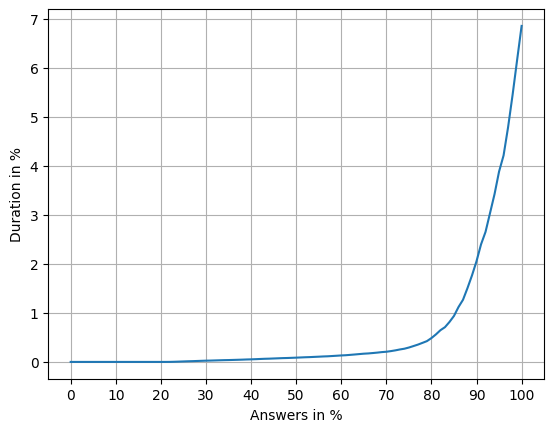

100% Mean: 75.24
80% Mean: 3.64


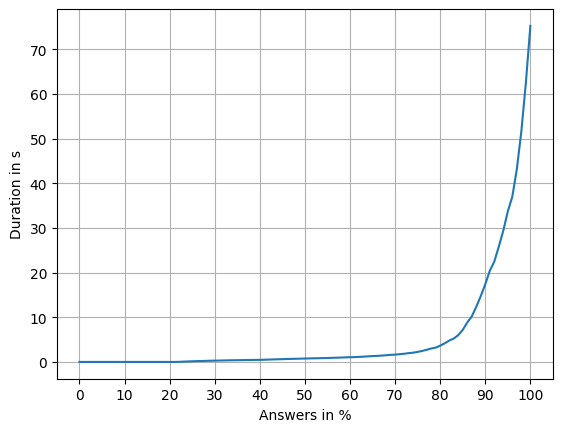

In [10]:
#Best-Answers
errs = list((abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start'])*100)/rightdset['Duration'])
showAvgPlots(errs, ylabel='Duration in %')
errs = list(abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start']))
showAvgPlots(errs, ylabel='Duration in s')

100% Mean: 7.86
80% Mean: 0.66


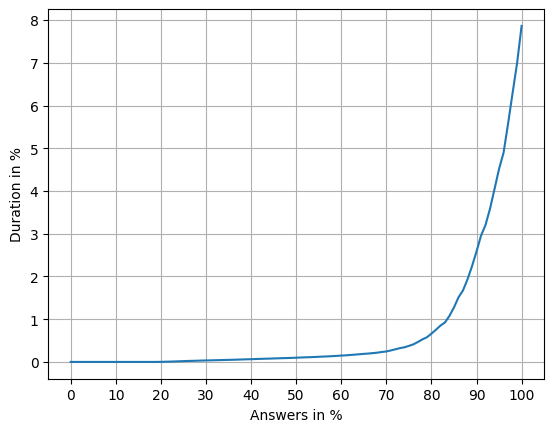

100% Mean: 85.54
80% Mean: 4.71


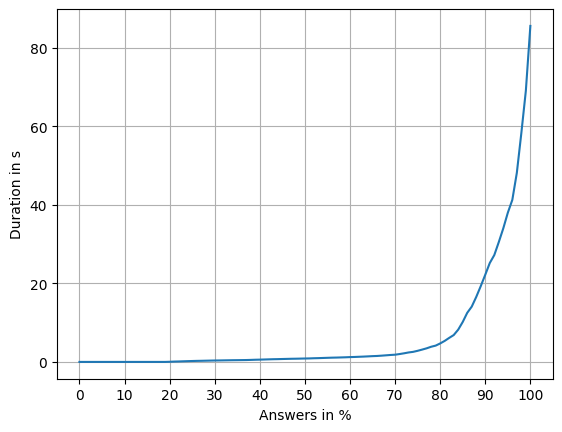

In [11]:
#Long-Answers
errs = list((abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start'])*100)/rightdset['Duration'])
showAvgPlots(errs, ylabel='Duration in %')
errs = list(abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start']))
showAvgPlots(errs, ylabel='Duration in s')

100% Mean: 7.36
80% Mean: 1.0


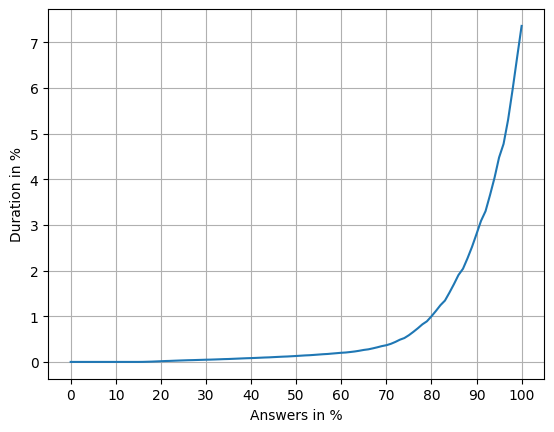

100% Mean: 80.39
80% Mean: 7.45


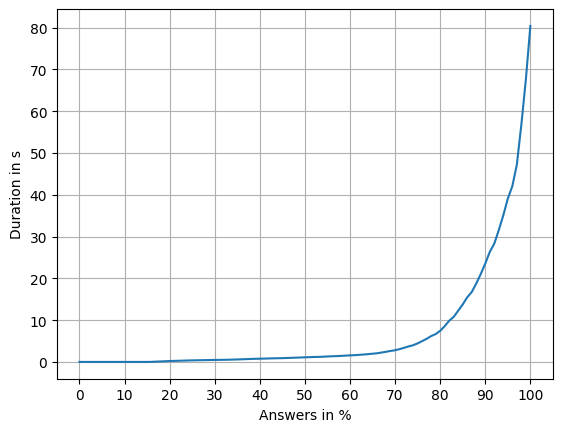

In [12]:
#Effective-Error
prob1 = 0.5 #to choose best
prob2 = 0.5 #to choose worst
errs1 = list((abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start'])*100)/rightdset['Duration'])
errs2 = list((abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start'])*100)/rightdset['Duration'])
errs  = [min(errs1[i], errs2[i])*prob1 + max(errs1[i], errs2[i])*prob2 for i in range(len(errs1))]
showAvgPlots(errs, ylabel='Duration in %')
errs1 = list(abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start']))
errs2 = list(abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start']))
errs  = [errs1[i]*0.5 + errs2[i]*0.5 for i in range(len(errs1))]
showAvgPlots(errs, ylabel='Duration in s')

Answer prediction results (Distilbert):

In [13]:
dset = dis_ansdset.join(quesdset)
rightdset = dset[dset['Video_ID'] == dset['Predicted_Video_ID']]
rightdset.head()
#rightdset has only the rows with correct predicted IDs.

,Predicted_Video_ID,BestAnswer,BestAnswer_start,BestAnswer_end,LongAnswer,LongAnswer_start,LongAnswer_end,Related_Video_IDs,Video_ID,Question,Answer,Start_timestamp,End_timestamp,Duration,Link
0,101,an alternative or a substitute to those IP add...,648,656,an alternative or a substitute to those IP add...,648,656,103 207 107,101,What is Kubernetes?,kubernetes is an open source container orchest...,64,98,852,https://youtu.be/VnvRFRk_51k
1,101,google,67,70,originally developed by google,67,70,103 207 107,101,Who developed Kubernetes?,Google,69,70,852,https://youtu.be/VnvRFRk_51k
2,101,google,67,70,a kubernetes cluster user would use to create ...,42,70,103 107 207,101,Who created Kubernetes?,Google,69,70,852,https://youtu.be/VnvRFRk_51k
3,101,keeps an overview of what's happening in the c...,322,326,basically keeps an overview of what's happenin...,322,326,406 105 103,101,What is the job of controller manager in Kuber...,controller manager which basically keeps an ov...,321,332,852,https://youtu.be/VnvRFRk_51k
4,101,scheduling containers on different nodes based...,337,343,scheduling containers on different nodes based...,337,346,406 407 201,101,What is the job of scheduler in Kubernetes?,scheduler which is basically responsible for s...,336,360,852,https://youtu.be/VnvRFRk_51k


100% Mean: 19.6
80% Mean: 8.41


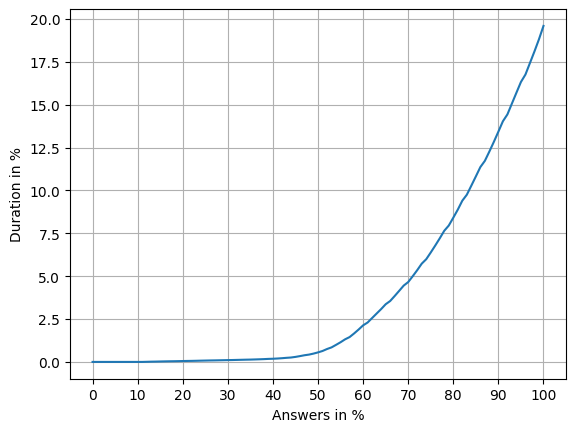

100% Mean: 193.82
80% Mean: 70.62


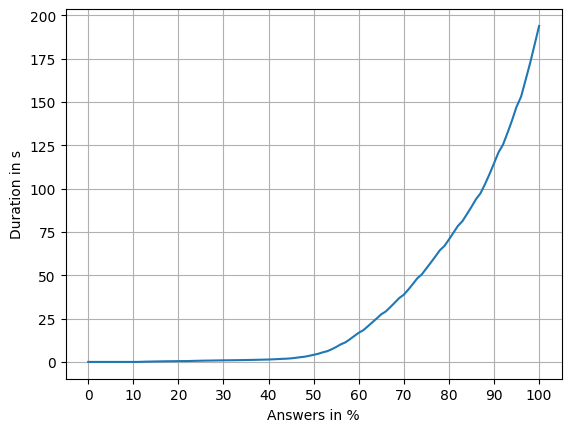

In [14]:
#Best-Answers
errs = list((abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start'])*100)/rightdset['Duration'])
showAvgPlots(errs, ylabel='Duration in %')
errs = list(abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start']))
showAvgPlots(errs, ylabel='Duration in s')

100% Mean: 19.35
80% Mean: 8.49


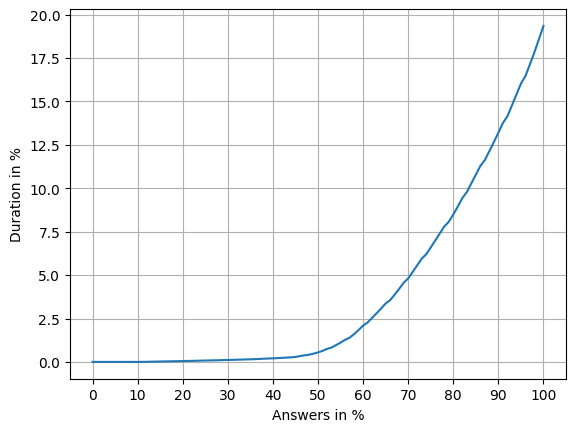

100% Mean: 190.65
80% Mean: 70.95


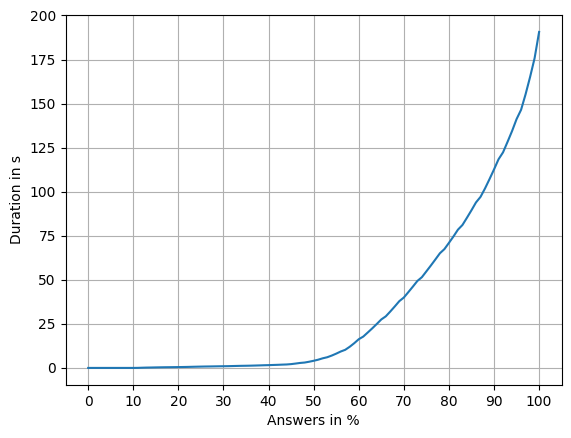

In [15]:
#Long-Answers
errs = list((abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start'])*100)/rightdset['Duration'])
showAvgPlots(errs, ylabel='Duration in %')
errs = list(abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start']))
showAvgPlots(errs, ylabel='Duration in s')

100% Mean: 19.47
80% Mean: 10.38


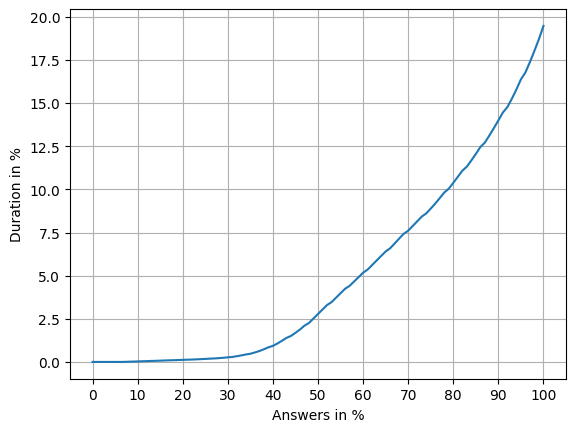

100% Mean: 192.24
80% Mean: 89.93


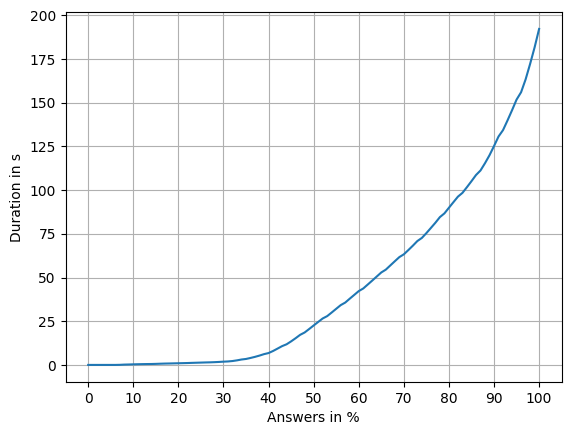

In [16]:
#Effective-Error
prob1 = 0.5 #to choose best
prob2 = 0.5 #to choose worst
errs1 = list((abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start'])*100)/rightdset['Duration'])
errs2 = list((abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start'])*100)/rightdset['Duration'])
errs  = [min(errs1[i], errs2[i])*prob1 + max(errs1[i], errs2[i])*prob2 for i in range(len(errs1))]
showAvgPlots(errs, ylabel='Duration in %')
errs1 = list(abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start']))
errs2 = list(abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start']))
errs  = [errs1[i]*0.5 + errs2[i]*0.5 for i in range(len(errs1))]
showAvgPlots(errs, ylabel='Duration in s')